Dataset:
https://s3.amazonaws.com/h2o-public-test-data/bigdata/laptop/citibike-nyc/31081_New_York_City__Hourly_2013.csv

Problem:
    For this task please import the NYC weather dataset which gives you weather conditions for every hour of every day of every month in 2013, and complete the following:

   1. Import the data.
   1. Run columnar transformation on Column "Temperature (C)" to (F):
       T(°F) = T(°C) × 1.8 + 32
   1. Append the column back to the original frame, call the column temp_f.
   1. Group by the month and day and aggregate to find the low, high, and average temperature every day in 2013.
   1. Visualize the average temperature each day of the year using plots.
   1. Filter or query the data to answer the following two questions:
   1. Question: What month/day was the coldest in NYC (use min temp)?
   1. Question: What month/day was the hottest in NYC (use max temp)?


In [1]:
import h2o
h2o.init()
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,25 mins 18 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_mihirzgr8_92sz2n
H2O cluster total nodes:,1
H2O cluster free memory:,1.610 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [2]:
weather="https://s3.amazonaws.com/h2o-public-test-data/bigdata/laptop/citibike-nyc/31081_New_York_City__Hourly_2013.csv"

In [3]:
#Importing the NYC Weather dataset
weather_df=h2o.import_file(path=weather)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
weather_df.describe()


Rows:8760
Cols:50




,Year Local,Month Local,Day Local,Hour Local,Year UTC,Month UTC,Day UTC,Hour UTC,Cavok Reported,Cloud Ceiling (m),Cloud Cover Fraction,Cloud Cover Fraction 1,Cloud Cover Fraction 2,Cloud Cover Fraction 3,Cloud Cover Fraction 4,Cloud Cover Fraction 5,Cloud Cover Fraction 6,Cloud Height (m) 1,Cloud Height (m) 2,Cloud Height (m) 3,Cloud Height (m) 4,Cloud Height (m) 5,Cloud Height (m) 6,Dew Point (C),Humidity Fraction,Precipitation One Hour (mm),Pressure Altimeter (mbar),Pressure Sea Level (mbar),Pressure Station (mbar),Snow Depth (cm),Temperature (C),Visibility (km),Weather Code 1,Weather Code 1/ Description,Weather Code 2,Weather Code 2/ Description,Weather Code 3,Weather Code 3/ Description,Weather Code 4,Weather Code 4/ Description,Weather Code 5,Weather Code 5/ Description,Weather Code 6,Weather Code 6/ Description,Weather Code Most Severe / Icon Code,Weather Code Most Severe,Weather Code Most Severe / Description,Wind Direction (degrees),Wind Gust (m/s),Wind Speed (m/s)
type,int,int,int,int,int,int,int,int,int,real,real,real,real,real,int,int,int,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,int,enum,int,enum,int,enum,int,enum,int,enum,int,enum,int,int,enum,int,real,real
mins,2013.0,1.0,1.0,0.0,2013.0,1.0,1.0,0.0,0.0,61.0,0.0,0.0,0.25,0.5,NaN,NaN,NaN,60.96,243.84,426.72,NaN,NaN,NaN,-22.2,0.1495,0.0,984.6493,NaN,NaN,NaN,-11.7,0.4023,1.0,,1.0,,1.0,,1.0,,1.0,,3.0,,0.0,1.0,,10.0,7.2,0.0
mean,2013.0,6.526027397260274,15.720547945205476,11.500000000000004,2013.0005707762557,6.525114155251141,15.72134703196347,11.500114155251142,0.0,1313.0120192307695,0.40708152049461876,0.3495019464163042,0.865257104194858,0.958720930232558,0.0,0.0,0.0,1289.618551531574,1647.7553803112314,2109.086024612403,0.0,0.0,0.0,4.8087215291289915,0.6071889321277325,1.3140266666666667,1018.1397621380335,0.0,0.0,0.0,12.802312006409522,14.326599313265422,5.036226415094339,,4.1160541586073505,,3.4972067039106145,,2.490196078431373,,2.3333333333333335,,3.0,,1.528310502283105,5.036226415094339,,199.22801147227534,9.496722017220174,2.439591663637464
maxs,2013.0,12.0,31.0,23.0,2014.0,12.0,31.0,23.0,0.0,3657.6,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3657.5999,3657.5999,3657.5999,NaN,NaN,NaN,24.4,1.0,26.924,1042.2113,NaN,NaN,NaN,36.1,16.0934,40.0,,60.0,,36.0,,27.0,,3.0,,3.0,,16.0,40.0,,360.0,20.58,10.8
sigma,0.0,3.4480481340692424,8.796749115212306,6.922581688234341,0.023885468333801296,3.4479224612123063,8.795911359231582,6.922499226031305,0.0,983.9837834758466,0.4592627865460921,0.42160673911513524,0.2021272320644814,0.10097347353236513,-0.0,-0.0,-0.0,941.0299969649625,898.3293913238305,907.4522018513926,-0.0,-0.0,-0.0,10.86120854804035,0.1839562249286177,2.6101039694258272,7.438238180444408,-0.0,-0.0,-0.0,9.88983916182101,3.624788000276402,5.388407968229686,,7.032184696768441,,6.846121104401717,,3.976795438639548,,1.0,,0.0,,4.3132955690507835,5.388407968229686,,104.09521202667845,1.904359860684349,1.6281704566349176
zeros,0,0,0,365,0,0,0,365,8737,0,4508,4508,0,0,0,0,0,0,0,0,0,0,0,138,0,272,0,0,0,0,136,0,0,,0,,0,,0,,0,,0,,7435,0,,0,0,1340
missing,0,0,0,0,0,0,0,0,23,5432,26,26,7282,8244,8760,8760,8760,4516,7282,8244,8760,8760,8760,23,23,7860,23,8760,8760,8760,23,23,7435,7435,8243,8243,8581,8581,8709,8709,8751,8751,8758,8758,0,7435,7435,4576,7134,507
0,2013.0,1.0,1.0,0.0,2013.0,1.0,1.0,5.0,0.0,2895.6,1.0,0.9,1.0,nan,nan,nan,nan,2895.5999,3352.8,nan,nan,nan,nan,-5.0,0.5447,nan,1013.0917,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,nan,nan,2.57
1,2013.0,1.0,1.0,1.0,2013.0,1.0,1.0,6.0,0.0,3048.0,1.0,1.0,nan,nan,nan,nan,nan,3048.0,nan,nan,nan,nan,nan,-4.4,0.5463,nan,1012.0759,nan,nan,nan,3.9,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,260.0,9.77,4.63
2,2013.0,1.0,1.0,2.0,2013.0,1.0,1.0,7.0,0.0,1828.8,1.0,1.0,nan,nan,nan,nan,nan,1828.7999,nan,nan,nan,nan,nan,-3.3,0.619,nan,1012.4145,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,nan,7.72,1.54


In [5]:
weather_df.columns

['Year Local',
 'Month Local',
 'Day Local',
 'Hour Local',
 'Year UTC',
 'Month UTC',
 'Day UTC',
 'Hour UTC',
 'Cavok Reported',
 'Cloud Ceiling (m)',
 'Cloud Cover Fraction',
 'Cloud Cover Fraction 1',
 'Cloud Cover Fraction 2',
 'Cloud Cover Fraction 3',
 'Cloud Cover Fraction 4',
 'Cloud Cover Fraction 5',
 'Cloud Cover Fraction 6',
 'Cloud Height (m) 1',
 'Cloud Height (m) 2',
 'Cloud Height (m) 3',
 'Cloud Height (m) 4',
 'Cloud Height (m) 5',
 'Cloud Height (m) 6',
 'Dew Point (C)',
 'Humidity Fraction',
 'Precipitation One Hour (mm)',
 'Pressure Altimeter (mbar)',
 'Pressure Sea Level (mbar)',
 'Pressure Station (mbar)',
 'Snow Depth (cm)',
 'Temperature (C)',
 'Visibility (km)',
 'Weather Code 1',
 'Weather Code 1/ Description',
 'Weather Code 2',
 'Weather Code 2/ Description',
 'Weather Code 3',
 'Weather Code 3/ Description',
 'Weather Code 4',
 'Weather Code 4/ Description',
 'Weather Code 5',
 'Weather Code 5/ Description',
 'Weather Code 6',
 'Weather Code 6/ Descriptio

In [6]:
#Calculate and append the column temp_f to the original dataframe 
weather_df['temp_f']=weather_df['Temperature (C)'] * 1.8 + 32

In [7]:
cols_1=['Year Local','Month Local','Day Local', 'temp_f']
cols_2=['temp_f']
cols_3=['Year Local' ,'Month Local','Day Local']
avg_daily=weather_df[cols_1].group_by(by=cols_3).mean(cols_2,na='ignore').get_frame()
avg_daily.describe()

Rows:365
Cols:4




,Year Local,Month Local,Day Local,mean_temp_f
type,int,int,int,real
mins,2013.0,1.0,1.0,14.449999999999998
mean,2013.0,6.526027397260274,15.72054794520548,54.8996392694064
maxs,2013.0,12.0,31.0,89.03750000000001
sigma,0.0,3.452584133232603,8.80832147298557,17.17283325539834
zeros,0,0,0,0
missing,0,0,0,0
0,2013.0,1.0,1.0,36.49999999999999
1,2013.0,1.0,2.0,26.204166666666666
2,2013.0,1.0,3.0,28.527499999999993


In [8]:
daily=avg_daily.as_data_frame(use_pandas=True)

In [9]:
#Add seperate date field
daily['date']=pd.to_datetime(daily[['Year Local', 'Month Local', 'Day Local']].rename(columns={'Year Local': 'year', 'Month Local': 'month', 'Day Local': 'day'}))

In [28]:
#this frame contains average temperature per day in 2013 (with date field)
daily


,Year Local,Month Local,Day Local,mean_temp_f,date
0,2013,1,1,36.500000,2013-01-01
1,2013,1,2,26.204167,2013-01-02
2,2013,1,3,28.527500,2013-01-03
3,2013,1,4,34.032500,2013-01-04
4,2013,1,5,36.462500,2013-01-05
5,2013,1,6,39.162500,2013-01-06
6,2013,1,7,40.572500,2013-01-07
7,2013,1,8,41.247500,2013-01-08
8,2013,1,9,44.352500,2013-01-09
9,2013,1,10,43.565000,2013-01-10


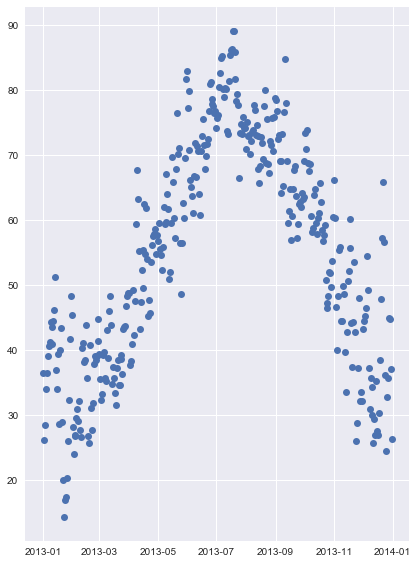

In [16]:
#Visualize the average daily temperate in 2013
Time = pd.Series(daily['date'])
r = pd.Series(daily['mean_temp_f'])

df = pd.DataFrame({'Time': Time, 'Value': r})

fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)
ax.plot_date(x=df.Time, y=df.Value, marker='o')
plt.tight_layout()
plt.show()



In [29]:
#Use group by to find min temperature on each day
min_daily=weather_df[cols_1].group_by(by=cols_3).min(cols_2,na='ignore').get_frame()

In [30]:
mdaily=min_daily.as_data_frame(use_pandas=True)

In [31]:
#Merge year,month, day to form date field
mdaily['date']=pd.to_datetime(daily[['Year Local', 'Month Local', 'Day Local']].rename(columns={'Year Local': 'year', 'Month Local': 'month', 'Day Local': 'day'}))

#Sort the min daily dataframe to find the coldest day
sm=mdaily.sort_values(by='min_temp_f')

#Print the first row to show the coldest day
sm.head(1)

#Solution: Coldest day in 2013 was 01-23-2013

,Year Local,Month Local,Day Local,min_temp_f,date
22,2013,1,23,10.94,2013-01-23


In [32]:
#Sort by setting ascending to false to get the hottest day in 2013 
mm=mdaily.sort_values(by='min_temp_f',ascending=False)

#print first row to show the hottest day
mm.head(1)

# Solution: 07-19-2013 was the hottest day in NYC

,Year Local,Month Local,Day Local,min_temp_f,date
199,2013,7,19,82.94,2013-07-19
